In [295]:
import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('data_raw.json', 'r')as read_file:
    data = json.load(read_file)

In [296]:

pd.set_option('display.max_rows', None)
 
pd.set_option('display.max_columns', None)

users = []

for name in data:
    user = data[name]
    if 'anketa' in user and 'gilbert' in user and user['anketa']['age'] < 60:
        user['results'] = user['anketa']
        user['results'] = user['results'] | {'name': name}
        if 'email' in user:
            user['results']['email'] = user['email']
        else:
            user['results']['email'] = ''

        user['results']['browser'] = user['browser']
        user['results']['datetime'] = datetime.fromtimestamp(user['datetime']['seconds'])
        user['results']['mobile'] = user['mobile']
        user['results']['os'] = user['os']
        user['results']['screen'] = user['screen']

        user['name'] = name
        users.append(user)


for user in users:
    annet = user['annet']

    left = 0
    right = 0
    both = 0


    for key in annet:
        single_annet = annet[key]
        
        if single_annet == 'right':
            right += 1

        if single_annet == 'left':
            left += 1

        if single_annet == 'both':
            both += 1

    if left >= 6:
        res = 'left'
    else:
        res = 'right'


    user['results'] = user['results'] | {'annet_left': left, 'annet_right': right, 'annet_both':both, 'annet':res}


for user in users:
    ishihara = user['ishihara']
    
    count = 0
    for answer in ishihara:
        
        if str(answer['value']) == answer['userAnswer']:
            count += 1 

    user['results'] = user['results'] | {'ishihara': count} 

for user in users:
    stroop = user['stroop']

    reaction_left = 0
    reaction_right = 0

    right_correct = 0
    left_correct = 0

    for s in stroop:
        if s['congruents']:
            if s['correctly']:
                reaction_left += s['reaction_time']
                left_correct += 1
        else:
            if s['correctly']:
                reaction_right += s['reaction_time']
                right_correct += 1

    user['results'] = user['results'] | {
        'stroop_correct': left_correct + right_correct,
        'stroop_r_left': reaction_left/left_correct,
        'stroop_r_right': reaction_right/right_correct
    } 



for user in users:
    gilbert = user['gilbert']

    res = {}

    for i, g in enumerate(gilbert):

        color_pair_index = i//21 + 1

        if g['direction']:
            direction = 'l'
        else:
            direction = 'r'
        
        if color_pair_index not in res:
            res[color_pair_index] = {}

        if direction not in res[color_pair_index]:
            res[color_pair_index][direction] = {
                'n': 0,
                't': 0,
                'm': 0,
                'd': 0,
                's': 0,
                'c': 0,
            }

        if 'a' not in res[color_pair_index]:
            res[color_pair_index]['a'] = {
                'n': 0,
                't': 0,
                'm': 0,
                'd': 0,
                's': 0,
                'c': 0,
            }

        if i%21 == 0:
            continue
        if g['reaction_time'] > 2000:
            continue

        if g['correctly']:
            res[color_pair_index][direction]['c'] += 1
            res[color_pair_index]['a']['c'] += 1

        res[color_pair_index][direction]['n'] += 1
        res[color_pair_index][direction]['t'] += g['reaction_time']
        res[color_pair_index]['a']['n'] += 1
        res[color_pair_index]['a']['t'] += g['reaction_time']

    for color_pair_index in res:
        for direction in res[color_pair_index]:
            if res[color_pair_index][direction]['c']>0:
                res[color_pair_index][direction]['m'] = res[color_pair_index][direction]['t']/res[color_pair_index][direction]['n']

    # for color_pair_index in res:
    #     if (res[color_pair_index]['a']['m']):
    #         res[color_pair_index]['l']['m'] = (res[color_pair_index]['a']['m'] - res[color_pair_index]['l']['m'])/(res[color_pair_index]['a']['m'])
    #         res[color_pair_index]['r']['m'] = (res[color_pair_index]['a']['m'] - res[color_pair_index]['r']['m'])/(res[color_pair_index]['a']['m'])
            # if(res[color_pair_index]['l']['m'] > res[color_pair_index]['r']['m']):
            #     res[color_pair_index]['r']['m'], res[color_pair_index]['l']['m'] = res[color_pair_index]['l']['m'], res[color_pair_index]['r']['m']


    # for i, g in enumerate(gilbert):

    #     color_pair_index = i//21 + 1

    #     if g['direction']:
    #         direction = 'l'
    #     else:
    #         direction = 'r'

    #     if i%21 == 0:
    #         continue
    #     if g['reaction_time'] > 2000:
    #         continue
    #     if not g['correctly']:
    #         continue

    #     res[color_pair_index][direction]['d'] += (g['reaction_time'] - res[color_pair_index][direction]['m'])**2
    #     res[color_pair_index]['a']['d'] += (g['reaction_time'] - res[color_pair_index][direction]['m'])**2

   
    # for color_pair_index in res:
    #     for direction in res[color_pair_index]:
    #         if res[color_pair_index][direction]['n']>1:
    #             res[color_pair_index][direction]['s'] = (res[color_pair_index][direction]['d']/(res[color_pair_index][direction]['n']-1))**0.5


    result = {
        f'{color_pair_index}_{key}_{direction}': res[color_pair_index][direction][key]
        for color_pair_index in res
        for direction in res[color_pair_index]
        for key in res[color_pair_index][direction]
    }

    user['results'] = user['results'] | result
    

table = {}
for user in users:
    for key in user['results']:
        if key not in table:
            table[key] = [] 
        # if user['results']['ishihara'] < 20:
        #     continue
        table[key].append(user['results'][key])


user['results']['browser'] = user['browser']
user['results']['datetime'] = user['datetime']
user['results']['mobile'] = user['mobile']
user['results']['os'] = user['os']
user['results']['screen'] = user['screen']



In [297]:

columns = [
    # 'datetime', 
    # 'email', 
    'age', 
    'sex', 
    # 'artist_other', 
    # 'education', 
    'synesthesia', 
    # 'visual_diseases_description', 
    'annet',
    # 'annet', 
    # 'annet_left', 
    # 'annet_both', 
    'ishihara', 
    # 'stroop_correct', 
    # 'stroop_r_left', 
    # 'stroop_r',

    # '1_n_l',
    # '1_n_r',
    # '1_n_a',
    '1_c_a',

    '1_m_l',
    '1_m_r',
    '1_m_a',

    # '1_s_l',
    # '1_s_r',
    # '1_s_a',


    # '2_n_l',
    # '2_n_r',
    # '2_n_a',
    '2_c_a',

    '2_m_l',
    '2_m_r',
    '2_m_a',

    # '2_s_l',
    # '2_s_r',
    # '2_s_a',

    # '3_n_l',
    # '3_n_r',
    # '3_n_a',
    '3_c_a',

    '3_m_l',
    '3_m_r',
    '3_m_a',


    # '4_n_l',
    # '4_n_r',
    # '4_n_a',
    '4_c_a',

    '4_m_l',
    '4_m_r',
    '4_m_a',


    # '5_n_l',
    # '5_n_r',
    # '5_n_a',
    '5_c_a',

    '5_m_l',
    '5_m_r',
    '5_m_a',

    # '6_n_l',
    # '6_n_r',
    # '6_n_a',
    '6_c_a',

    '6_m_l',
    '6_m_r',
    '6_m_a',

    # '2_t_l',
    # '2_t_r',
    # '2_c_l',
    # '2_c_r',

    # '3_t_l',
    # '3_t_r',
    # '3_c_l',
    # '3_c_r',

    # '4_t_l',
    # '4_t_r',
    # '4_c_l',
    # '4_c_r',

    # '5_t_l',
    # '5_t_r',
    # '5_c_l',
    # '5_c_r',

    # '6_t_l',
    # '6_t_r',
    # '6_c_l',
    # '6_c_r',
]

df = pd.DataFrame(data=table, columns=columns, index=table['name'])

# df.to_csv('data_psycat_gilbert_experiment.csv')
df = df.sort_values(by=['annet', 'sex', 'age'])


# df = df.drop(['unstable_teal_chimpanzee','magnanimous_cyan_cuckoo', 'polite_mint_octopus'])

df

,age,sex,synesthesia,annet,ishihara,1_c_a,1_m_l,1_m_r,1_m_a,2_c_a,2_m_l,2_m_r,2_m_a,3_c_a,3_m_l,3_m_r,3_m_a,4_c_a,4_m_l,4_m_r,4_m_a,5_c_a,5_m_l,5_m_r,5_m_a,6_c_a,6_m_l,6_m_r,6_m_a
confident_black_cod,20,female,yes,left,17,15,814.250000,1257.888889,1049.117647,6,690.222222,925.700000,814.157895,12,736.000000,752.888889,744.444444,16,988.900000,855.600000,922.250000,19,958.777778,958.900000,958.842105,20,654.200000,522.700000,588.450000
desirous_azure_moose,20,female,no,left,18,20,552.600000,632.200000,592.400000,15,1068.375000,929.800000,991.388889,8,685.285714,987.250000,846.333333,12,398.800000,366.700000,382.750000,18,942.800000,956.111111,949.105263,18,609.200000,454.300000,531.750000
polite_rust_sable,20,female,no,left,23,15,1099.500000,937.900000,1009.722222,15,640.111111,803.200000,725.947368,17,701.666667,756.875000,727.647059,19,392.800000,424.200000,408.500000,19,647.700000,470.600000,559.150000,20,515.700000,475.000000,495.350000
feebleminded_cyan_pike,21,female,no,left,20,20,920.700000,874.000000,897.350000,16,1120.777778,1187.125000,1152.000000,12,1086.777778,938.000000,1049.583333,20,767.400000,997.600000,882.500000,20,689.500000,670.500000,680.000000,20,499.800000,553.600000,526.700000
polite_lavender_crane,21,female,yes,left,22,20,840.800000,921.900000,881.350000,17,793.222222,1150.875000,961.529412,18,1013.200000,1024.875000,1018.388889,19,875.200000,659.700000,767.450000,19,639.200000,638.900000,639.050000,20,600.400000,550.200000,575.300000
humility_magenta_cod,28,female,no,left,20,11,1771.000000,1427.800000,1615.000000,10,1550.750000,1232.500000,1359.800000,8,1543.800000,1160.400000,1352.100000,16,1147.875000,914.666667,1024.411765,18,854.625000,1086.200000,983.277778,20,783.200000,688.900000,736.050000
passion_yellow_elephant,31,female,no,left,23,13,1277.166667,1161.000000,1214.615385,20,924.800000,879.900000,902.350000,20,746.300000,759.400000,752.850000,20,578.900000,619.800000,599.350000,20,654.500000,736.500000,695.500000,20,486.500000,438.200000,462.350000
determined_black_deer,32,female,no,left,21,17,1268.750000,1454.333333,1367.000000,3,1209.400000,1160.285714,1180.750000,20,997.500000,1127.100000,1062.300000,20,597.000000,767.600000,682.300000,17,1044.555556,1008.555556,1026.555556,18,969.111111,1135.300000,1056.578947
magnanimous_gold_vulture,21,male,no,left,23,17,1208.333333,1172.500000,1191.470588,19,1268.400000,1076.555556,1177.526316,17,1081.111111,1100.000000,1090.000000,20,723.700000,526.800000,625.250000,20,740.900000,657.200000,699.050000,20,646.600000,608.200000,627.400000
polite_indigo_gerbil,21,male,yes,left,23,18,1225.500000,1247.000000,1237.444444,15,1231.750000,642.500000,937.125000,17,1018.000000,1242.142857,1110.294118,20,720.000000,571.400000,645.700000,19,625.100000,592.400000,608.750000,20,439.000000,447.900000,443.450000


Text(0, 0.5, 'Число испытуемых')

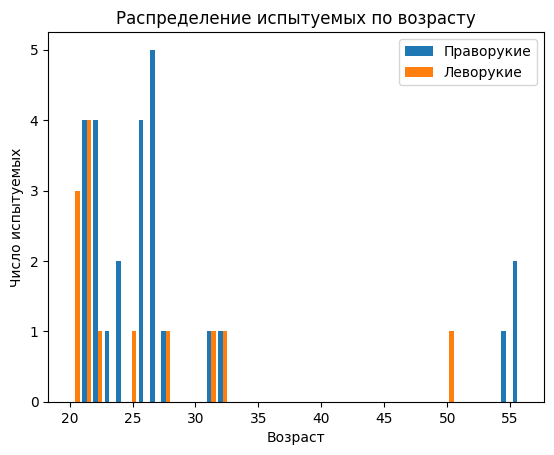

In [298]:
plt.hist([df[df['annet']=='right']['age'], df[df['annet']=='left']['age']], bins = int(40), label=['Праворукие','Леворукие'])
plt.legend()
plt.title('Распределение испытуемых по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Число испытуемых')

In [299]:
columns = [
    'synesthesia', 
    'annet',
    'ishihara', 
    '1_n_a',
    '1_m_l',
    '1_m_r',
    '1_m_a',


    '2_c_a',

    '2_m_l',
    '2_m_r',
    '2_m_a',

    '3_c_a',

    '3_m_l',
    '3_m_r',
    '3_m_a',

    '4_c_a',

    '4_m_l',
    '4_m_r',
    '4_m_a',

    '5_c_a',

    '5_m_l',
    '5_m_r',
    '5_m_a',

    '6_c_a',

    '6_m_l',
    '6_m_r',
    '6_m_a',

]


# df1 = df.loc[df['1_n_a']>13]
# df2 = df.loc[df['2_n_a']>13]
df_smart_1 = df.loc[df['1_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '1_c_a',
    '1_m_l',
    '1_m_r',
    '1_m_a',
]]
df_smart_2 = df.loc[df['2_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '2_c_a',
    '2_m_l',
    '2_m_r',
    '2_m_a',
]]
df_smart_3 = df.loc[df['3_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '3_c_a',
    '3_m_l',
    '3_m_r',
    '3_m_a',
]]
df_smart_4 = df.loc[df['4_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '4_c_a',
    '4_m_l',
    '4_m_r',
    '4_m_a',
]]
df_smart_5 = df.loc[df['5_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '5_c_a',
    '5_m_l',
    '5_m_r',
    '5_m_a',
]]
df_smart_6 = df.loc[df['6_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '6_c_a',
    '6_m_l',
    '6_m_r',
    '6_m_a',
]]

In [300]:
df_smart_1_left = df_smart_1.loc[df_smart_1['annet']=='left']
df_smart_1_right = df_smart_1.loc[df_smart_1['annet']=='right']
df_smart_2_left = df_smart_2.loc[df_smart_2['annet']=='left']
df_smart_2_right = df_smart_2.loc[df_smart_2['annet']=='right']
df_smart_3_left = df_smart_3.loc[df_smart_3['annet']=='left']
df_smart_3_right = df_smart_3.loc[df_smart_3['annet']=='right']
df_smart_4_left = df_smart_4.loc[df_smart_4['annet']=='left']
df_smart_4_right = df_smart_4.loc[df_smart_4['annet']=='right']
df_smart_5_left = df_smart_5.loc[df_smart_5['annet']=='left']
df_smart_5_right = df_smart_5.loc[df_smart_5['annet']=='right']
df_smart_6_left = df_smart_6.loc[df_smart_6['annet']=='left']
df_smart_6_right = df_smart_6.loc[df_smart_6['annet']=='right']

In [301]:
from scipy.stats import lognorm, shapiro, mannwhitneyu, wilcoxon, ttest_rel
import statsmodels.api as sm

[909.2433333333332, 1009.6326388888889, 944.1388888888889, 763.8704545454547, 762.8583333333333, 624.3871794871795]
[992.0788888888889, 984.9587301587302, 1000.3824404761904, 728.969696969697, 753.551282051282, 597.6]


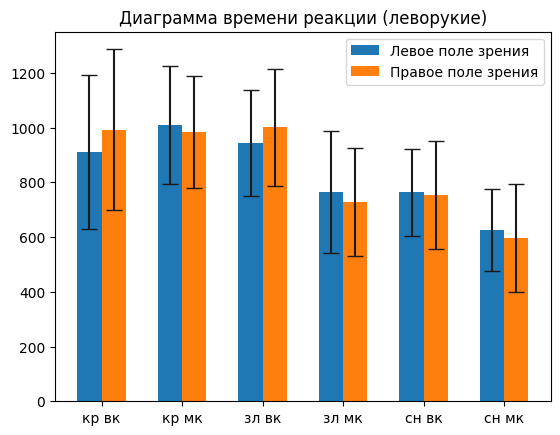

In [302]:

cols_l = [f'{i}_t_l' for i in range(1,7)]
cols_r = [f'{i}_t_r' for i in range(1,7)]
cols_names = ['кр вк','кр мк','зл вк','зл мк','сн вк','сн мк']

values_mean_l = [df_smart_1_left['1_m_l'].mean(), 
                 df_smart_2_left['2_m_l'].mean(), 
                 df_smart_3_left['3_m_l'].mean(), 
                 df_smart_4_left['4_m_l'].mean(), 
                 df_smart_5_left['5_m_l'].mean(), 
                 df_smart_6_left['6_m_l'].mean()]

values_std_l = [df_smart_1_left['1_m_l'].std(), 
                df_smart_2_left['2_m_l'].std(), 
                df_smart_3_left['3_m_l'].std(), 
                df_smart_4_left['4_m_l'].std(), 
                df_smart_5_left['5_m_l'].std(), 
                df_smart_6_left['6_m_l'].std()]

values_mean_r = [df_smart_1_left['1_m_r'].mean(), 
                 df_smart_2_left['2_m_r'].mean(), 
                 df_smart_3_left['3_m_r'].mean(), 
                 df_smart_4_left['4_m_r'].mean(), 
                 df_smart_5_left['5_m_r'].mean(), 
                 df_smart_6_left['6_m_r'].mean()]

values_std_r = [df_smart_1_left['1_m_r'].std(), 
                df_smart_2_left['2_m_r'].std(), 
                df_smart_3_left['3_m_r'].std(), 
                df_smart_4_left['4_m_r'].std(), 
                df_smart_5_left['5_m_r'].std(), 
                df_smart_6_left['6_m_r'].std()]


print(values_mean_l)
print(values_mean_r)
width = 0.3
x = np.arange(len(cols_names))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, values_mean_l, width, yerr=values_std_l, error_kw={'ecolor':'0.1','capsize':6}, label='Левое поле зрения')
rects2 = ax.bar(x + width/2, values_mean_r, width, yerr=values_std_r, error_kw={'ecolor':'0.1','capsize':6}, label='Правое поле зрения')

ax.set_title('Диаграмма времени реакции (леворукие)')
ax.set_xticks(x)
ax.set_xticklabels(cols_names)
ax.legend()

[1001.7233044733046, 1029.4272108843538, 1056.9520502645503, 800.6311111111113, 810.0679487179489, 589.8407356532357]
[1009.1762085137085, 1064.8454648526078, 1049.8135582010584, 832.1595555555556, 822.3426282051282, 606.8316239316239]


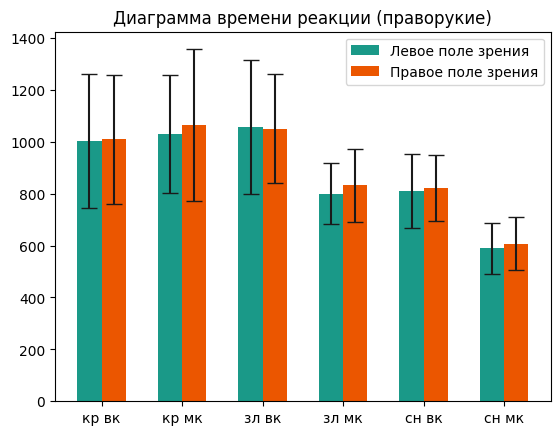

In [303]:

cols_l = [f'{i}_t_l' for i in range(1,7)]
cols_r = [f'{i}_t_r' for i in range(1,7)]
cols_names = ['кр вк','кр мк','зл вк','зл мк','сн вк','сн мк']

values_mean_l = [df_smart_1_right['1_m_l'].mean(), 
                 df_smart_2_right['2_m_l'].mean(), 
                 df_smart_3_right['3_m_l'].mean(), 
                 df_smart_4_right['4_m_l'].mean(), 
                 df_smart_5_right['5_m_l'].mean(), 
                 df_smart_6_right['6_m_l'].mean()]

values_std_l = [df_smart_1_right['1_m_l'].std(), 
                df_smart_2_right['2_m_l'].std(), 
                df_smart_3_right['3_m_l'].std(), 
                df_smart_4_right['4_m_l'].std(), 
                df_smart_5_right['5_m_l'].std(), 
                df_smart_6_right['6_m_l'].std()]

values_mean_r = [df_smart_1_right['1_m_r'].mean(), 
                 df_smart_2_right['2_m_r'].mean(), 
                 df_smart_3_right['3_m_r'].mean(), 
                 df_smart_4_right['4_m_r'].mean(), 
                 df_smart_5_right['5_m_r'].mean(), 
                 df_smart_6_right['6_m_r'].mean()]

values_std_r = [df_smart_1_right['1_m_r'].std(), 
                df_smart_2_right['2_m_r'].std(), 
                df_smart_3_right['3_m_r'].std(), 
                df_smart_4_right['4_m_r'].std(), 
                df_smart_5_right['5_m_r'].std(), 
                df_smart_6_right['6_m_r'].std()]

print(values_mean_l)
print(values_mean_r)

width = 0.3
x = np.arange(len(cols_names))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, values_mean_l, width, yerr=values_std_l, color="#1a9988", error_kw={'ecolor':'0.1','capsize':6}, label='Левое поле зрения')
rects2 = ax.bar(x + width/2, values_mean_r, width, yerr=values_std_r, color="#eb5600", error_kw={'ecolor':'0.1','capsize':6}, label='Правое поле зрения')

ax.set_title('Диаграмма времени реакции (праворукие)')
ax.set_xticks(x)
ax.set_xticklabels(cols_names)
ax.legend()

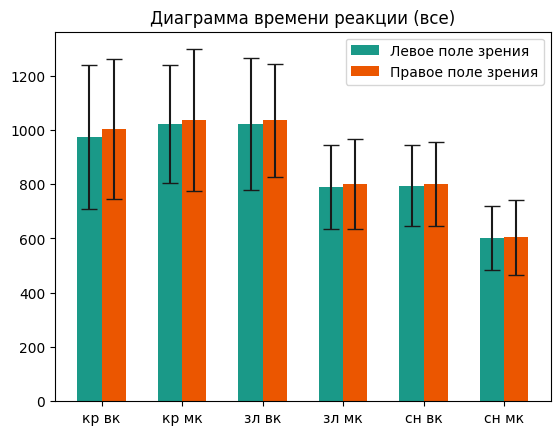

In [304]:

cols_l = [f'{i}_t_l' for i in range(1,7)]
cols_r = [f'{i}_t_r' for i in range(1,7)]
cols_names = ['кр вк','кр мк','зл вк','зл мк','сн вк','сн мк']

values_mean_l = [df_smart_1['1_m_l'].mean(), 
                 df_smart_2['2_m_l'].mean(), 
                 df_smart_3['3_m_l'].mean(), 
                 df_smart_4['4_m_l'].mean(), 
                 df_smart_5['5_m_l'].mean(), 
                 df_smart_6['6_m_l'].mean()]

values_std_l = [df_smart_1['1_m_l'].std(), 
                df_smart_2['2_m_l'].std(), 
                df_smart_3['3_m_l'].std(), 
                df_smart_4['4_m_l'].std(), 
                df_smart_5['5_m_l'].std(), 
                df_smart_6['6_m_l'].std()]

values_mean_r = [df_smart_1['1_m_r'].mean(), 
                 df_smart_2['2_m_r'].mean(), 
                 df_smart_3['3_m_r'].mean(), 
                 df_smart_4['4_m_r'].mean(), 
                 df_smart_5['5_m_r'].mean(), 
                 df_smart_6['6_m_r'].mean()]

values_std_r = [df_smart_1['1_m_r'].std(), 
                df_smart_2['2_m_r'].std(), 
                df_smart_3['3_m_r'].std(), 
                df_smart_4['4_m_r'].std(), 
                df_smart_5['5_m_r'].std(), 
                df_smart_6['6_m_r'].std()]





width = 0.3
x = np.arange(len(cols_names))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, values_mean_l, width, yerr=values_std_l, color="#1a9988", error_kw={'ecolor':'0.1','capsize':6}, label='Левое поле зрения')
rects2 = ax.bar(x + width/2, values_mean_r, width, yerr=values_std_r, color="#eb5600", error_kw={'ecolor':'0.1','capsize':6}, label='Правое поле зрения')

ax.set_title('Диаграмма времени реакции (все)')
ax.set_xticks(x)
ax.set_xticklabels(cols_names)
ax.legend()

In [305]:
wilcoxon(df_smart_1_right['1_m_l'], df_smart_1_right['1_m_r'])

WilcoxonResult(statistic=118.0, pvalue=0.7990336418151855)

In [306]:
df_smart_1_right

,synesthesia,annet,ishihara,1_c_a,1_m_l,1_m_r,1_m_a
disheartened_olive_monkey,no,right,19,18,953.400000,1001.444444,976.157895
indifferent_yellow_bat,no,right,19,15,1252.125000,1372.000000,1312.062500
courage_gray_ruff,no,right,21,20,1061.100000,1129.900000,1095.500000
excited_tan_pollock,no,right,21,20,575.800000,632.200000,604.000000
incompetent_blue_catfish,no,right,23,18,1137.400000,835.500000,1003.222222
polite_azure_chipmunk,no,right,22,17,940.888889,888.600000,913.368421
lonely_gold_flamingo,yes,right,16,16,1089.600000,1332.750000,1197.666667
polite_olive_raccoon,no,right,17,16,621.800000,698.000000,653.176471
vivacity_lavender_pollock,no,right,22,20,573.700000,716.800000,645.250000
slothful_blue_kingfisher,yes,right,21,19,1026.800000,777.900000,902.350000


In [307]:
wilcoxon(df_smart_2_right['2_m_l'], df_smart_2_right['2_m_r'])

WilcoxonResult(statistic=45.0, pvalue=0.6697998046875)

In [308]:
df_smart_2_right.describe()

,ishihara,2_c_a,2_m_l,2_m_r,2_m_a
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,22.214286,17.714286,1029.427211,1064.845465,1044.135726
std,1.050902,2.016416,226.171494,291.693127,223.942253
min,20.000000,14.000000,760.600000,573.000000,666.800000
25%,21.250000,16.250000,847.825000,962.428571,930.361842
50%,23.000000,18.000000,979.250000,1016.444444,1006.948830
75%,23.000000,19.000000,1140.477679,1186.888889,1128.619298
max,23.000000,20.000000,1482.875000,1808.333333,1622.357143


In [309]:
wilcoxon(df_smart_3_right['3_m_l'], df_smart_3_right['3_m_r'])

WilcoxonResult(statistic=71.0, pvalue=0.550872802734375)

In [310]:
df_smart_3_right.describe()

,ishihara,3_c_a,3_m_l,3_m_r,3_m_a
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,21.444444,17.611111,1056.952050,1049.813558,1052.956719
std,1.722591,2.252812,259.560349,210.305030,207.386468
min,17.000000,14.000000,660.800000,640.500000,650.650000
25%,20.250000,17.000000,859.750000,924.269444,907.151316
50%,22.000000,18.000000,1033.000000,1098.928571,1049.160819
75%,23.000000,19.750000,1264.027778,1160.232143,1194.617647
max,23.000000,20.000000,1498.000000,1400.222222,1439.333333


In [311]:
wilcoxon(df_smart_4_right['4_m_l'], df_smart_4_right['4_m_r'])

WilcoxonResult(statistic=99.0, pvalue=0.09031611680984497)

In [312]:
df_smart_4_right

,synesthesia,annet,ishihara,4_c_a,4_m_l,4_m_r,4_m_a
disheartened_olive_monkey,no,right,19,19,869.200000,1056.300000,962.750000
indifferent_yellow_bat,no,right,19,19,839.300000,930.800000,885.050000
magnanimous_cyan_cuckoo,no,right,22,19,775.600000,937.200000,856.400000
courage_gray_ruff,no,right,21,20,881.500000,865.100000,873.300000
excited_tan_pollock,no,right,21,20,658.200000,680.400000,669.300000
incompetent_blue_catfish,no,right,23,20,821.800000,923.800000,872.800000
polite_azure_chipmunk,no,right,22,20,589.400000,621.400000,605.400000
lonely_gold_flamingo,yes,right,16,19,929.777778,1001.600000,967.578947
polite_olive_raccoon,no,right,17,19,646.700000,580.444444,615.315789
vivacity_lavender_pollock,no,right,22,20,891.500000,789.400000,840.450000


In [313]:
wilcoxon(df_smart_5_right['5_m_l'], df_smart_5_right['5_m_r'])

WilcoxonResult(statistic=160.0, pvalue=0.7078457474708557)

In [314]:
df_smart_5_right.describe()

,ishihara,5_c_a,5_m_l,5_m_r,5_m_a
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,21.346154,19.115385,810.067949,822.342628,816.613889
std,1.937881,1.210848,143.482106,128.369017,123.098117
min,16.000000,16.000000,607.500000,586.800000,597.150000
25%,20.250000,19.000000,678.250000,745.325000,718.412500
50%,22.000000,20.000000,813.450000,816.250000,808.475000
75%,23.000000,20.000000,916.041667,907.925000,894.300000
max,23.000000,20.000000,1144.300000,1127.900000,1088.900000


In [315]:
wilcoxon(df_smart_6_right['6_m_l'], df_smart_6_right['6_m_r'])

WilcoxonResult(statistic=148.0, pvalue=0.49919503927230835)

In [316]:
df_smart_6_right.describe()

,ishihara,6_c_a,6_m_l,6_m_r,6_m_a
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,21.346154,19.307692,589.840736,606.831624,598.910716
std,1.937881,0.884047,98.457714,101.470119,83.257703
min,16.000000,17.000000,440.428571,432.800000,468.550000
25%,20.250000,19.000000,524.300000,521.900000,518.820588
50%,22.000000,19.500000,553.550000,589.250000,597.275000
75%,23.000000,20.000000,658.991667,686.500000,654.315789
max,23.000000,20.000000,808.100000,782.600000,740.550000


In [317]:
wilcoxon(df_smart_1_left['1_m_l'], df_smart_1_left['1_m_r'])

WilcoxonResult(statistic=16.0, pvalue=0.275390625)

In [318]:
df_smart_1_left.describe()

,ishihara,1_c_a,1_m_l,1_m_r,1_m_a
count,10.00000,10.0,10.000000,10.000000,10.000000
mean,20.80000,18.0,909.243333,992.078889,951.002595
std,2.20101,2.0,281.345238,294.027902,274.464894
min,17.00000,15.0,552.600000,502.400000,530.750000
25%,19.25000,17.0,655.737500,885.666667,785.403289
50%,21.50000,18.0,880.750000,929.900000,953.536111
75%,22.75000,20.0,1181.125000,1228.375000,1155.882353
max,23.00000,20.0,1268.750000,1454.333333,1367.000000


In [319]:
wilcoxon(df_smart_2_left['2_m_l'], df_smart_2_left['2_m_r'])

WilcoxonResult(statistic=18.0, pvalue=1.0)

In [320]:
df_smart_2_left.describe()

,ishihara,2_c_a,2_m_l,2_m_r,2_m_a
count,8.000000,8.00000,8.000000,8.000000,8.000000
mean,21.750000,16.37500,1009.632639,984.958730,995.191706
std,1.832251,2.13391,214.834313,204.135280,150.001198
min,18.000000,14.00000,640.111111,642.500000,725.947368
25%,21.500000,15.00000,891.905556,860.725000,928.431250
50%,22.500000,15.50000,1049.000000,1003.177778,976.459150
75%,23.000000,17.50000,1148.520833,1159.937500,1123.250000
max,23.000000,20.00000,1268.400000,1209.714286,1177.526316


In [321]:
wilcoxon(df_smart_3_left['3_m_l'], df_smart_3_left['3_m_r'])

WilcoxonResult(statistic=2.0, pvalue=0.0234375)

In [322]:
df_smart_3_left

,synesthesia,annet,ishihara,3_c_a,3_m_l,3_m_r,3_m_a
polite_rust_sable,no,left,23,17,701.666667,756.875000,727.647059
polite_lavender_crane,yes,left,22,18,1013.200000,1024.875000,1018.388889
passion_yellow_elephant,no,left,23,20,746.300000,759.400000,752.850000
determined_black_deer,no,left,21,20,997.500000,1127.100000,1062.300000
magnanimous_gold_vulture,no,left,23,17,1081.111111,1100.000000,1090.000000
polite_indigo_gerbil,yes,left,23,17,1018.000000,1242.142857,1110.294118
saucy_olive_monkey,no,left,22,18,747.444444,755.333333,751.388889
relaxed_rust_seabass,yes,left,23,18,1247.888889,1237.333333,1242.611111


In [323]:
wilcoxon(df_smart_4_left['4_m_l'], df_smart_4_left['4_m_r'])

WilcoxonResult(statistic=27.0, pvalue=0.6376953125)

In [324]:
df_smart_4_left.describe()

,ishihara,4_c_a,4_m_l,4_m_r,4_m_a
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,21.545455,19.090909,763.870455,728.969697,745.796524
std,1.916436,1.578261,223.061790,198.237444,194.414502
min,17.000000,16.000000,392.800000,424.200000,408.500000
25%,20.500000,19.000000,601.000000,595.600000,627.750000
50%,22.000000,20.000000,723.700000,659.700000,682.300000
75%,23.000000,20.000000,932.050000,885.133333,902.375000
max,23.000000,20.000000,1147.875000,1025.800000,1024.411765


In [325]:
wilcoxon(df_smart_5_left['5_m_l'], df_smart_5_left['5_m_r'])

WilcoxonResult(statistic=31.0, pvalue=0.339599609375)

In [326]:
df_smart_5_left.describe()

,ishihara,5_c_a,5_m_l,5_m_r,5_m_a
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,21.076923,19.153846,762.858333,753.551282,759.167746
std,2.100061,0.987096,158.739821,196.453214,173.609909
min,17.000000,17.000000,508.300000,470.600000,511.650000
25%,20.000000,19.000000,647.700000,638.900000,639.050000
50%,22.000000,19.000000,734.000000,676.200000,699.050000
75%,23.000000,20.000000,877.200000,956.111111,949.105263
max,23.000000,20.000000,1044.555556,1086.200000,1026.555556


In [327]:
wilcoxon(df_smart_6_left['6_m_l'], df_smart_6_left['6_m_r'])

WilcoxonResult(statistic=29.0, pvalue=0.2734375)

In [328]:
df_smart_6_left

,synesthesia,annet,ishihara,6_c_a,6_m_l,6_m_r,6_m_a
confident_black_cod,yes,left,17,20,654.200000,522.7,588.450000
desirous_azure_moose,no,left,18,18,609.200000,454.3,531.750000
polite_rust_sable,no,left,23,20,515.700000,475.0,495.350000
feebleminded_cyan_pike,no,left,20,20,499.800000,553.6,526.700000
polite_lavender_crane,yes,left,22,20,600.400000,550.2,575.300000
humility_magenta_cod,no,left,20,20,783.200000,688.9,736.050000
passion_yellow_elephant,no,left,23,20,486.500000,438.2,462.350000
determined_black_deer,no,left,21,18,969.111111,1135.3,1056.578947
magnanimous_gold_vulture,no,left,23,20,646.600000,608.2,627.400000
polite_indigo_gerbil,yes,left,23,20,439.000000,447.9,443.450000


In [329]:
mannwhitneyu(df_smart_1_right['1_m_a'], df_smart_1_left['1_m_a'])

MannwhitneyuResult(statistic=127.0, pvalue=0.5023349543605021)

In [330]:
mannwhitneyu(df_smart_2_right['2_m_a'], df_smart_2_left['2_m_a'])

MannwhitneyuResult(statistic=61.0, pvalue=0.7639490884072928)

In [331]:
mannwhitneyu(df_smart_3_right['3_m_a'], df_smart_3_left['3_m_a'])

MannwhitneyuResult(statistic=86.0, pvalue=0.4613566753612521)

In [332]:
mannwhitneyu(df_smart_4_right['4_m_a'], df_smart_4_left['4_m_a'])

MannwhitneyuResult(statistic=167.0, pvalue=0.3192924065518604)

In [333]:
mannwhitneyu(df_smart_5_right['5_m_a'], df_smart_5_left['5_m_a'])

MannwhitneyuResult(statistic=208.0, pvalue=0.25138206973114385)

In [334]:
mannwhitneyu(df_smart_6_right['6_m_a'], df_smart_6_left['6_m_a'])

MannwhitneyuResult(statistic=189.0, pvalue=0.5612758361345778)

In [335]:
# df1 = df.loc[df['1_n_a']>13]
# df2 = df.loc[df['2_n_a']>13]
df_smart_12 = df.loc[df['1_c_a']>13].loc[df['2_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '1_c_a',
    '1_m_l',
    '1_m_r',
    '1_m_a',
    '2_c_a',
    '2_m_l',
    '2_m_r',
    '2_m_a',
]]
df_smart_12_left = df_smart_12.loc[df_smart_12['annet']=='left']
df_smart_12_right = df_smart_12.loc[df_smart_12['annet']=='right']


df_smart_34 = df.loc[df['3_c_a']>13].loc[df['4_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '3_c_a',
    '3_m_l',
    '3_m_r',
    '3_m_a',
    '4_c_a',
    '4_m_l',
    '4_m_r',
    '4_m_a',
]]
df_smart_34_left = df_smart_34.loc[df_smart_34['annet']=='left']
df_smart_34_right = df_smart_34.loc[df_smart_34['annet']=='right']


df_smart_56 = df.loc[df['5_c_a']>13].loc[df['6_c_a']>13][[
    'synesthesia', 
    'annet',
    'ishihara', 
    '5_c_a',
    '5_m_l',
    '5_m_r',
    '5_m_a',
    '6_c_a',
    '6_m_l',
    '6_m_r',
    '6_m_a',
]]
df_smart_56_left = df_smart_56.loc[df_smart_56['annet']=='left']
df_smart_56_right = df_smart_56.loc[df_smart_56['annet']=='right']


In [336]:
df_smart_12_left.describe()

,ishihara,1_c_a,1_m_l,1_m_r,1_m_a,2_c_a,2_m_l,2_m_r,2_m_a
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,21.571429,18.571429,915.219048,898.271429,905.783894,15.857143,1021.751587,999.967120,1008.454807
std,1.902379,1.988060,282.851937,266.782981,271.399710,1.676163,229.074884,215.671196,156.871266
min,18.000000,15.000000,552.600000,502.400000,530.750000,14.000000,640.111111,642.500000,725.947368
25%,21.000000,17.500000,699.950000,753.100000,736.875000,15.000000,911.423611,866.500000,949.327206
50%,22.000000,20.000000,920.700000,921.900000,897.350000,15.000000,1068.375000,1076.555556,991.388889
75%,23.000000,20.000000,1153.916667,1055.200000,1100.596405,16.500000,1176.263889,1169.000000,1132.833333
max,23.000000,20.000000,1225.500000,1247.000000,1237.444444,19.000000,1268.400000,1209.714286,1177.526316


In [337]:
df_smart_12_right.describe()

,ishihara,1_c_a,1_m_l,1_m_r,1_m_a,2_c_a,2_m_l,2_m_r,2_m_a
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,22.384615,18.538462,1016.536233,977.664011,998.092415,18.000000,994.546612,1007.654090,999.657155
std,0.869718,1.808101,227.644868,249.743502,217.434808,1.779513,192.259515,206.318553,155.962938
min,21.000000,15.000000,573.700000,632.200000,604.000000,15.000000,760.600000,573.000000,666.800000
25%,22.000000,18.000000,963.000000,821.875000,902.350000,17.000000,832.400000,960.000000,920.315789
50%,23.000000,19.000000,1061.100000,916.800000,1001.000000,18.000000,966.000000,1013.444444,1004.055556
75%,23.000000,20.000000,1144.300000,1129.900000,1113.000000,19.000000,1092.625000,1058.555556,1077.266667
max,23.000000,20.000000,1275.625000,1549.857143,1357.500000,20.000000,1426.111111,1350.777778,1229.294118


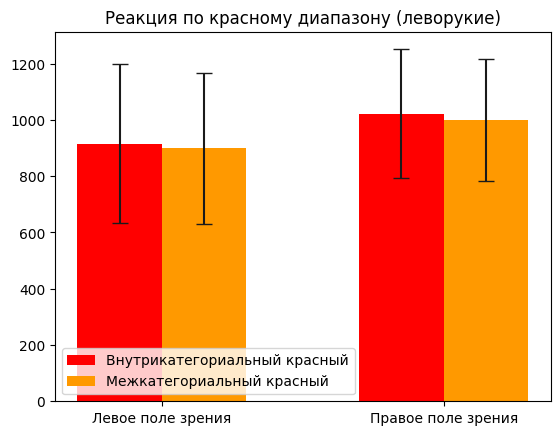

In [338]:
cols_l = ['1_m_l', '2_m_l']
cols_r = ['1_m_r', '2_m_r']
cols_names = ['Левое поле зрения', 'Правое поле зрения']

values_mean_l = df_smart_12_left[cols_l].mean().to_numpy()
values_std_l = df_smart_12_left[cols_l].std().to_numpy()
values_mean_r = df_smart_12_left[cols_r].mean().to_numpy()
values_std_r = df_smart_12_left[cols_r].std().to_numpy()

width = 0.3
x = np.arange(len(cols_names))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_mean_l, width, yerr=values_std_l, color="#ff0000", error_kw={'ecolor':'0.1','capsize':6}, label='Внутрикатегориальный красный')
rects2 = ax.bar(x + width/2, values_mean_r, width, yerr=values_std_r, color="#ff9900", error_kw={'ecolor':'0.1','capsize':6}, label='Межкатегориальный красный')

ax.set_title('Реакция по красному диапазону (леворукие)')
ax.set_xticks(x)
ax.set_xticklabels(cols_names)
ax.legend()

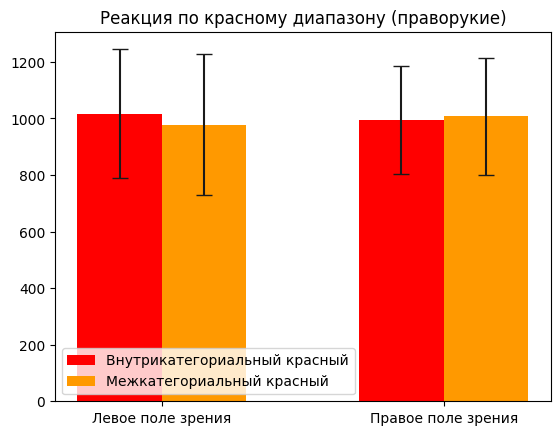

In [339]:
cols_l = ['1_m_l', '2_m_l']
cols_r = ['1_m_r', '2_m_r']
cols_names = ['Левое поле зрения', 'Правое поле зрения']

values_mean_l = df_smart_12_right[cols_l].mean().to_numpy()
values_std_l = df_smart_12_right[cols_l].std().to_numpy()
values_mean_r = df_smart_12_right[cols_r].mean().to_numpy()
values_std_r = df_smart_12_right[cols_r].std().to_numpy()

width = 0.3
x = np.arange(len(cols_names))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_mean_l, width, yerr=values_std_l, color="#ff0000", error_kw={'ecolor':'0.1','capsize':6}, label='Внутрикатегориальный красный')
rects2 = ax.bar(x + width/2, values_mean_r, width, yerr=values_std_r, color="#ff9900", error_kw={'ecolor':'0.1','capsize':6}, label='Межкатегориальный красный')

ax.set_title('Реакция по красному диапазону (праворукие)')
ax.set_xticks(x)
ax.set_xticklabels(cols_names)
ax.legend()

In [340]:
wilcoxon(df_smart_12_left['1_m_a'], df_smart_12_left['2_m_a'])

WilcoxonResult(statistic=10.0, pvalue=0.578125)

In [341]:
wilcoxon(df_smart_12_left['1_m_r'], df_smart_12_left['2_m_r'])

WilcoxonResult(statistic=9.0, pvalue=0.46875)

In [342]:
wilcoxon(df_smart_12_left['1_m_l'], df_smart_12_left['2_m_l'])

WilcoxonResult(statistic=7.0, pvalue=0.296875)

In [343]:
wilcoxon(df_smart_12_right['1_m_a'], df_smart_12_right['2_m_a'])

WilcoxonResult(statistic=45.0, pvalue=1.0)

In [344]:
wilcoxon(df_smart_12_right['1_m_r'], df_smart_12_right['2_m_r'])

WilcoxonResult(statistic=43.0, pvalue=0.892578125)

In [345]:
wilcoxon(df_smart_12_right['1_m_l'], df_smart_12_right['2_m_l'])

WilcoxonResult(statistic=42.0, pvalue=0.83935546875)

In [346]:
mannwhitneyu(df_smart_12_left['2_m_r'], df_smart_12_right['2_m_r'])

MannwhitneyuResult(statistic=46.0, pvalue=1.0)

In [347]:
wilcoxon(df_smart_12_right['1_m_r'], df_smart_12_right['2_m_r'])

WilcoxonResult(statistic=43.0, pvalue=0.892578125)

In [348]:
wilcoxon(df_smart_34_right['3_m_a'], df_smart_34_right['4_m_a'])

WilcoxonResult(statistic=1.0, pvalue=1.52587890625e-05)

In [349]:
wilcoxon(df_smart_34_left['3_m_a'], df_smart_34_left['4_m_a'])

WilcoxonResult(statistic=0.0, pvalue=0.0078125)

In [350]:
wilcoxon(df_smart_56_left['5_m_a'], df_smart_56_left['6_m_a'])

WilcoxonResult(statistic=8.0, pvalue=0.006103515625)

In [351]:
wilcoxon(df_smart_56_right['5_m_a'], df_smart_56_right['6_m_a'])

WilcoxonResult(statistic=4.0, pvalue=2.086162567138672e-07)